# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [2]:
# Load data
df = pd.read_csv("C:\\Users\\hamma\\Documents\\GitHub\\Project-1-Linear-Regression-Project\\sales_predictions.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Set column headers to lowercase
df.columns = df.columns.str.lower()
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Remove identifier columns
df = df.drop(columns=['item_identifier','outlet_identifier'])
df.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Check and remove duplicates
dup = df.duplicated().sum()
df.drop_duplicates()
dup_2 = df.duplicated().sum()
print(f'There are {dup} duplicates. {dup_2} duplicates were removed.')

There are 0 duplicates. 0 duplicates were removed.


In [6]:
# Check for missing values
miss_val = df.isna().sum().sum()
print(f'There are {miss_val} missing values.')

There are 3873 missing values.


In [7]:
# Confirm dtypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                7060 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                6113 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


> The datatype for each column appear to be correct

In [8]:
# Select object columns
obj_cols = df.select_dtypes(include='object')
obj_cols.head()

,item_fat_content,item_type,outlet_size,outlet_location_type,outlet_type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [9]:
# Use placeholder for missing values
# For loop to replace missing values with 'MISSING' or '-1'
for col in df:
    #get dtype for column
    dt = df[col].dtype 
    #check if it is a number
    if dt=='int' or dt=='float':
        df[col].fillna(value=-1, inplace=True)
    else:
        df[col].fillna(value='MISSING', inplace=True)
print(f'There are {df.isna().sum().sum()} missing values')
df.head()

There are 0 missing values


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,MISSING,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
# Check for inconsistencies in categorical values
# For loop to print unique values for each column with dtype as object

for col in df:
    dt = df[col].dtype
    if dt=='int' or dt=='float':
        pass
    else: 
        values = df[col].value_counts()
        print(values, '\n')

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: item_fat_content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: item_type, dtype: int64 

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: outlet_establishment_year, dtype: int64 

Medium     2793
MISSING    2410
Small      2388
High        932
Name: outlet_size, dtype: int64 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: outlet_location_type, dtype: int64 

Supermarket Type1 

In [11]:
# Replace inconsistent values
df['item_fat_content'] = df['item_fat_content'].replace({'LF':'Low Fat',
                                                         'low fat':'Low Fat',
                                                         'reg':'Regular'})
df['outlet_size'] = df['outlet_size'].replace({'High':'Large'})

# Use for loop to confirm changes were made correctly
for col in df:
    dt = df[col].dtype
    if dt=='int' or dt=='float':
        pass
    else: 
        values = df[col].value_counts()
        print(values, '\n')

Low Fat    5517
Regular    3006
Name: item_fat_content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: item_type, dtype: int64 

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: outlet_establishment_year, dtype: int64 

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: outlet_size, dtype: int64 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: outlet_location_type, dtype: int64 

Supermarket Type1    5577
Grocery Store        1083
Supermarket Ty

In [12]:
# Remove unnecessary rows
df['item_type'] = df['item_type'].drop(df[df['item_type']=='Starchy Foods'].index)
df['item_type'] = df['item_type'].drop(df[df['item_type']=='Others'].index)
df['item_type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Breakfast                 110
Seafood                    64
Name: item_type, dtype: int64

> Starch Foods and Others were deleted as they could add unnecessary over lap or unhelpful data

In [13]:
# Check for impossible values
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


> There are no impossible values in the data

# Exploratory Data Analysis

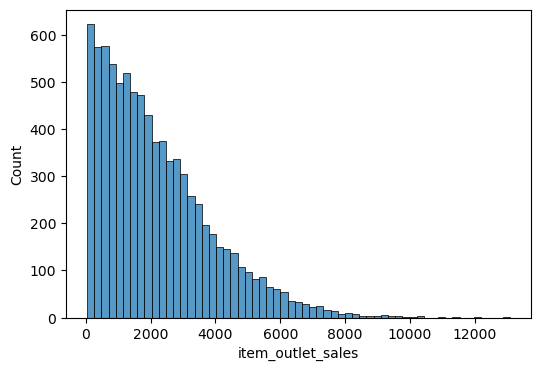

In [40]:
# Item Sales histogram
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df['item_outlet_sales']);

> Item sales have a right skew and several outliers past 10,000

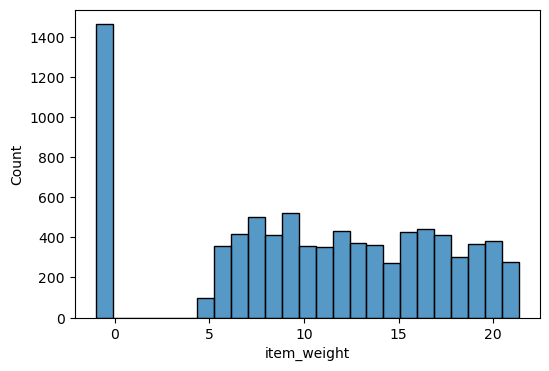

In [63]:
# Item weight histogram
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df['item_weight']);

> The outliers seen in the histogram is due to the place holder -1 for missing values

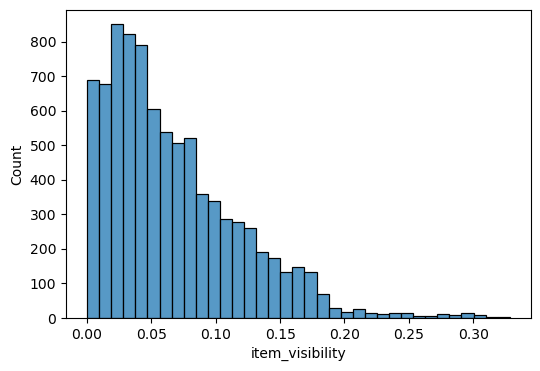

In [49]:
# Item visibility histogram
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df['item_visibility'], bins=35);

> Item visibility is skewed to the right

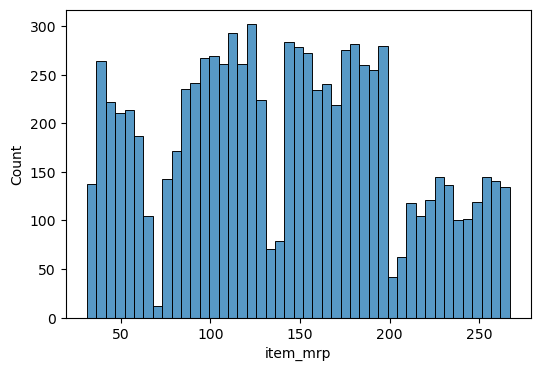

In [58]:
# Item MRP histogram
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df['item_mrp'], bins=45);

In [ ]:
# Visualizing effect of categorical data on item sales
